#### Problem 1: Linear Regression

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import math

In [32]:
data = pd.read_csv('lab03_dataset_1.csv')
data.shape

(6435, 7)

In [33]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


#### 1) Create a heatmap for the entire dataset. (1 mark)

In [34]:
coRelation = data.corr()
coRelation

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


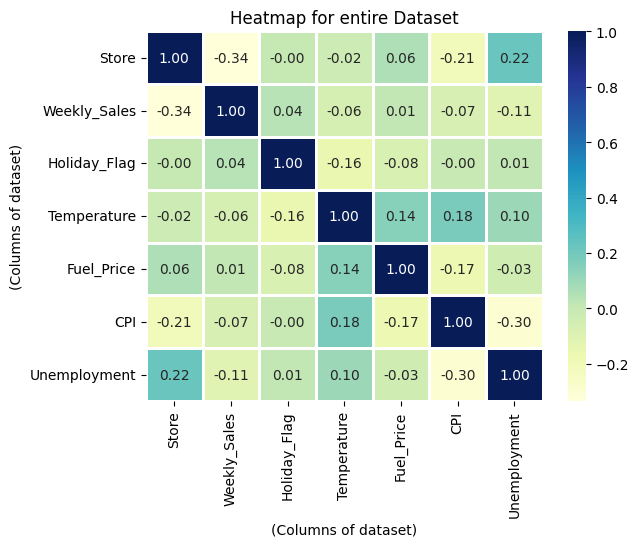

In [35]:
plt.figure()
sb.heatmap(coRelation, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.9)
plt.title("Heatmap for entire Dataset")
plt.xlabel("(Columns of dataset)")
plt.ylabel("(Columns of dataset)")
plt.show()

#### 2. The input features should be subjected to feature scaling, specifically the min-max scaling. (2 marks)

In [36]:
# Formula for MinMaxScaling -> Xscaled = (X - Xmin) / (Xmax - Xmin);

minMaxScalar = MinMaxScaler()
scaledInfo = minMaxScalar.fit_transform(data.iloc[:, 0:-1])
print(scaledInfo)

[[0.         0.39729115 0.         0.43414873 0.0501002  0.84049976]
 [0.         0.39681079 1.         0.39696673 0.03807615 0.84194103]
 [0.         0.38850052 0.         0.41086106 0.02104208 0.84240534]
 ...
 [1.         0.14533712 0.         0.55313112 0.76553106 0.65497724]
 [1.         0.1408095  0.         0.57270059 0.75       0.65501271]
 [1.         0.15249124 0.         0.59598826 0.70641283 0.65479569]]


In [37]:
data.columns[0:-1]

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI'],
      dtype='object')

In [38]:
scaledInfo = pd.DataFrame(scaledInfo, columns=data.columns[0:-1])
scaledInfo.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
0,0.0,0.397291,0.0,0.434149,0.050100,0.840500
1,0.0,0.396811,1.0,0.396967,0.038076,0.841941
2,0.0,0.388501,0.0,0.410861,0.021042,0.842405
3,0.0,0.332458,0.0,0.476419,0.044589,0.842707
4,0.0,0.372661,0.0,0.475147,0.076653,0.843008


In [39]:
data.head(12)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,1545418.53,0,65.86,2.770,210.622857,7.808


In [40]:
X = scaledInfo
Y = data[['Unemployment']]

In [41]:
X.head(12)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
0,0.0,0.397291,0.0,0.434149,0.050100,0.840500
1,0.0,0.396811,1.0,0.396967,0.038076,0.841941
2,0.0,0.388501,0.0,0.410861,0.021042,0.842405
3,0.0,0.332458,0.0,0.476419,0.044589,0.842707
4,0.0,0.372661,0.0,0.475147,0.076653,0.843008
5,0.0,0.340720,0.0,0.585616,0.097695,0.843310
6,0.0,0.349857,0.0,0.554207,0.124248,0.841679
7,0.0,0.330990,0.0,0.523581,0.130261,0.839726
8,0.0,0.383790,0.0,0.629452,0.123747,0.837773
9,0.0,0.370059,0.0,0.664579,0.149299,0.835819


In [42]:
Y.head(12)

,Unemployment
0,8.106
1,8.106
2,8.106
3,8.106
4,8.106
5,8.106
6,8.106
7,8.106
8,7.808
9,7.808


#### 3) Once the scaled input features are ready, learn a model using sklearn’s linear regression module. Use a 90-10 train-test split for the learning process. (2 marks)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state = 50)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5791, 6)
(5791, 1)
(644, 6)
(644, 1)


#### 4. After you generate the linear regression model, output the regression score, coefficients, intercept and mean squared error (over the test set). (5 marks)

In [44]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)

LinearRegression()

In [45]:
y_pred = linearRegression.predict(X_test)
y_pred

array([[8.41655868],
       [7.49528114],
       [9.45606643],
       [8.92436984],
       [8.17644534],
       [6.74748105],
       [8.8940023 ],
       [8.02118312],
       [9.15760342],
       [7.02927127],
       [7.5704457 ],
       [7.72413281],
       [8.45027047],
       [8.81919418],
       [9.15771915],
       [7.96252112],
       [9.00635117],
       [7.88665287],
       [8.98815053],
       [6.76312862],
       [7.98376896],
       [8.20100931],
       [8.31932201],
       [8.49526181],
       [7.59878711],
       [7.72624843],
       [7.45271169],
       [7.94768625],
       [7.87717616],
       [6.726625  ],
       [9.08016081],
       [7.57418677],
       [7.68050437],
       [8.87654029],
       [7.1490012 ],
       [9.4568534 ],
       [9.07763723],
       [9.54486817],
       [8.42640894],
       [8.77518054],
       [9.35133786],
       [8.33398126],
       [7.99653459],
       [8.45654304],
       [8.549506  ],
       [8.93004218],
       [8.31940591],
       [6.848

In [46]:
regressionScore = linearRegression.score(X_test, Y_test)
print("Regression Score : ", regressionScore)

Regression Score :  0.11704622373849771


In [47]:
coefficient = linearRegression.coef_
print(coefficient)

[[ 0.896888   -0.87931589  0.17990202  1.92166115 -1.02598096 -1.61963928]]


In [48]:
intercepts = linearRegression.intercept_
print(intercepts)

[7.75701579]


In [49]:
meanSquareError = mean_squared_error(Y_test, y_pred)
meanSquareError

3.0203881954717917

#### 5. Create a scatter plot which showcases the true output and the predicted output for the test case. Make sure to display a single plot which should contain both the data points. Use two different colors to represent the two types of data. Don’t forget to add a legend to the plot. (3 marks)

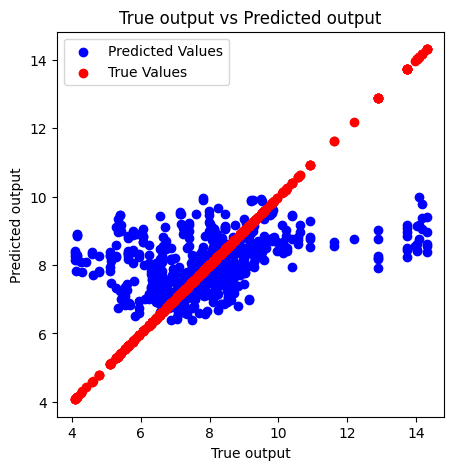

In [50]:
plt.figure(figsize=(5, 5))
plt.scatter(Y_test, y_pred, color='blue', label="Predicted Values")
plt.scatter(Y_test, Y_test, color='red', label="True Values")
plt.title("True output vs Predicted output")
plt.xlabel("True output")
plt.ylabel("Predicted output")
plt.legend()
plt.show()

#### ----------------------------------------------------------------------------------------------------------------------------------------

#### Problem 2: k – Nearest Neighbors

In [51]:
# Loading the dataset
data = pd.read_csv('lab03_dataset_2.csv')
data.shape

(5960, 8)

In [52]:
data.head(15)

,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
0,1,1,1100,11,0,94,1,2
1,2,1,1300,7,2,122,0,1
2,3,1,1500,4,0,149,1,3
3,4,1,1500,9,0,180,1,1
4,5,0,1700,3,0,93,0,1
5,6,1,1700,9,0,101,1,1
6,7,1,1800,5,2,77,1,2
7,8,1,1800,11,0,89,0,1
8,9,1,2000,3,2,217,1,3
9,10,1,2000,16,0,116,0,2


In [53]:
# Splitting data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)
print(train_data.shape)
print(test_data.shape)

(4768, 8)
(1192, 8)


In [54]:
train_data.head()

,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
0,1,1,1100,11,0,94,1,2
1,2,1,1300,7,2,122,0,1
2,3,1,1500,4,0,149,1,3
3,4,1,1500,9,0,180,1,1
4,5,0,1700,3,0,93,0,1


In [55]:
test_data.head()

,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
4768,4769,1,25000,14,0,144,2,1
4769,4770,1,25000,10,2,126,7,1
4770,4771,1,25000,14,4,199,2,4
4771,4772,1,25000,8,1,135,3,2
4772,4773,1,25000,9,3,107,1,2


In [56]:
# Extracting features and target variable
X_train = train_data.drop(columns=['FRAUD'])
y_train = train_data['FRAUD']
X_test = test_data.drop(columns=['FRAUD'])
y_test = test_data['FRAUD']

In [57]:
print(X_train.head())
print(X_test.head())

   CASE_ID  TOTAL_SPEND  DOCTOR_VISITS  NUM_CLAIMS  MEMBER_DURATION  \
0        1         1100             11           0               94   
1        2         1300              7           2              122   
2        3         1500              4           0              149   
3        4         1500              9           0              180   
4        5         1700              3           0               93   

   OPTOM_PRESC  NUM_MEMBERS  
0            1            2  
1            0            1  
2            1            3  
3            1            1  
4            0            1  
      CASE_ID  TOTAL_SPEND  DOCTOR_VISITS  NUM_CLAIMS  MEMBER_DURATION  \
4768     4769        25000             14           0              144   
4769     4770        25000             10           2              126   
4770     4771        25000             14           4              199   
4771     4772        25000              8           1              135   
4772     4773        25

#### 1) The input features used during training should be subjected to feature scaling, specifically the min-max scaling. (2 marks)

In [58]:
# 1. Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2) You will use sklearn’s k – nearest neighbors module to learn a classification model with multiple nearest neighbors ranging from 2 to 5. Apply the learned k–NN model to classify the test set. Compute the misclassification rates for k ranging from 2 to 5. Use Euclidean distance as the similarity measure. (5 marks)

In [59]:
for k in [2, 3, 4, 5]:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    misclassificationRate = 1 - accuracy_score(y_test, y_pred)
    print("------------------------------------------------------------------------------------------------------------------------------------")
    print("The n-neighbour is :", k)    
    print(f"The misclassification when k = {k}, is {misclassificationRate:.4f}")
    print("------------------------------------------------------------------------------------------------------------------------------------")


------------------------------------------------------------------------------------------------------------------------------------
The n-neighbour is : 2
The misclassification when k = 2, is 0.1661
------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
The n-neighbour is : 3
The misclassification when k = 3, is 0.1804
------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
The n-neighbour is : 4
The misclassification when k = 4, is 0.1451
------------------------------------------------------------------------------------------------------------------------------------
-

#### 3) Next, apply sklearn’s k–d tree module to classify the test set. In a similar manner to the above scenario, compute the misclassification rates for k ranging from 2 to 5. Use Manhattan distance as the similarity measure. (5 marks)

In [60]:
for k in [2, 3, 4, 5]:
    knnKDTree = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree', metric='manhattan')
    knnKDTree.fit(X_train_scaled, y_train)
    y_pred = knnKDTree.predict(X_test_scaled)
    misclassificationRate = 1 - accuracy_score(y_test, y_pred)
    print("------------------------------------------------------------------------------------------------------------------------------------")
    print("The n-neighbour is :", k)    
    print(f"The misclassification when k = {k}, is {misclassificationRate:.4f}")
    print("------------------------------------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------------------------------------
The n-neighbour is : 2
The misclassification when k = 2, is 0.1661
------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
The n-neighbour is : 3
The misclassification when k = 3, is 0.1745
------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
The n-neighbour is : 4
The misclassification when k = 4, is 0.1502
------------------------------------------------------------------------------------------------------------------------------------
-